EDA Questions / Tasks:
1. Are there correlations between stats and legendary status?
2. Are there correlations between stats and Pokemon's typing?
3. Is there a correlation between catch_rate and legendary status?
4. Is there power creep from earlier generations to later generations?
5. Create overall correlation chart with all variables.
6. Are there correlations between primary typings and secondary typings, meaning are there common type combinations across the dataset?
7. Is there a correlation between egg groups and primary typings and secondary typings?

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Prevent warnings from appearing
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Change the amount of rows shown in printed dataframes
pd.set_option('display.max_rows', None, 'display.max_columns', None)

# Set seaborn theme
sns.set_theme()

In [4]:
pokedex = pd.read_csv('../data/pokedex_merged.csv')
pokedex = pokedex.where(pd.notnull(pokedex), None)

In [5]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [6]:
type_colors = {'Grass': '#82C95B', 
               'Fire': '#E87A3D', 
               'Water': '#639CE4', 
               'Normal': '#ACAD99', 
               'Bug': '#ACC23E', 
               'Poison': '#B369AF', 
               'Electric': '#E7C536', 
               'Ground': '#CEB250', 
               'Fairy': '#E8B0EB', 
               'Fighting': '#C45D4C', 
               'Psychic': '#E96C95', 
               'Rock': '#BAA85E', 
               'Ghost': '#816DB6', 
               'Ice': '#81CFD7', 
               'Dragon': '#7038F8', 
               'Flying': '#90AAD7', 
               'Steel': '#9FA9AF', 
               'Dark': '#79726B'}

type_order = ['Grass', 
               'Fire', 
               'Water', 
               'Normal', 
               'Bug', 
               'Poison', 
               'Electric', 
               'Ground', 
               'Fairy', 
               'Fighting', 
               'Psychic', 
               'Rock', 
               'Ghost', 
               'Ice', 
               'Dragon', 
               'Flying', 
               'Steel', 
               'Dark']

## General EDA

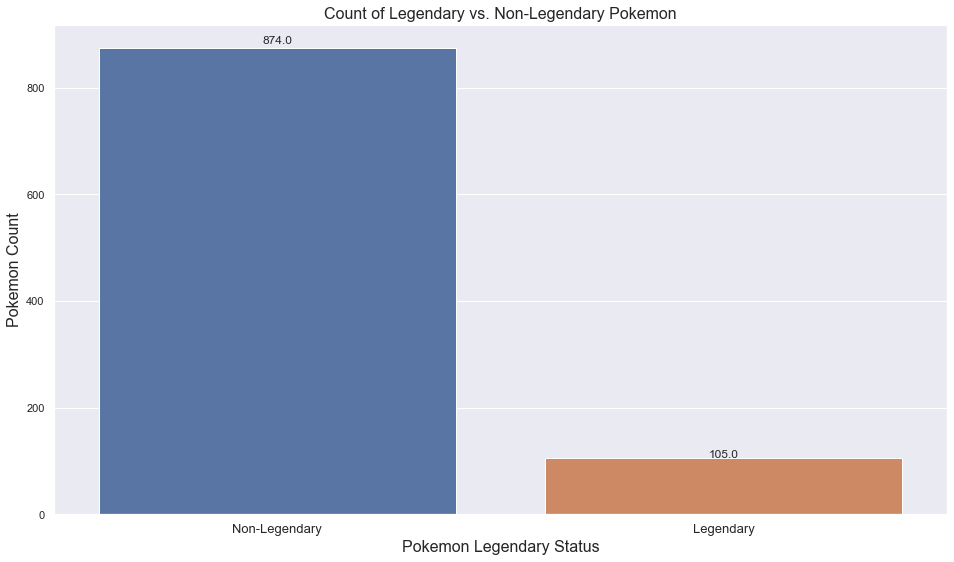

In [7]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='legendary', 
                  data=pokedex, 
                  order=pokedex['legendary'].value_counts().index)
show_values(p)

fontsize = 16
plt.xlabel('Pokemon Legendary Status', fontsize=fontsize)
plt.ylabel('Pokemon Count', fontsize=fontsize)
plt.xticks(fontsize=fontsize-3, ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])
plt.yticks(fontsize=fontsize-5)
plt.title('Count of Legendary vs. Non-Legendary Pokemon', fontsize=fontsize);

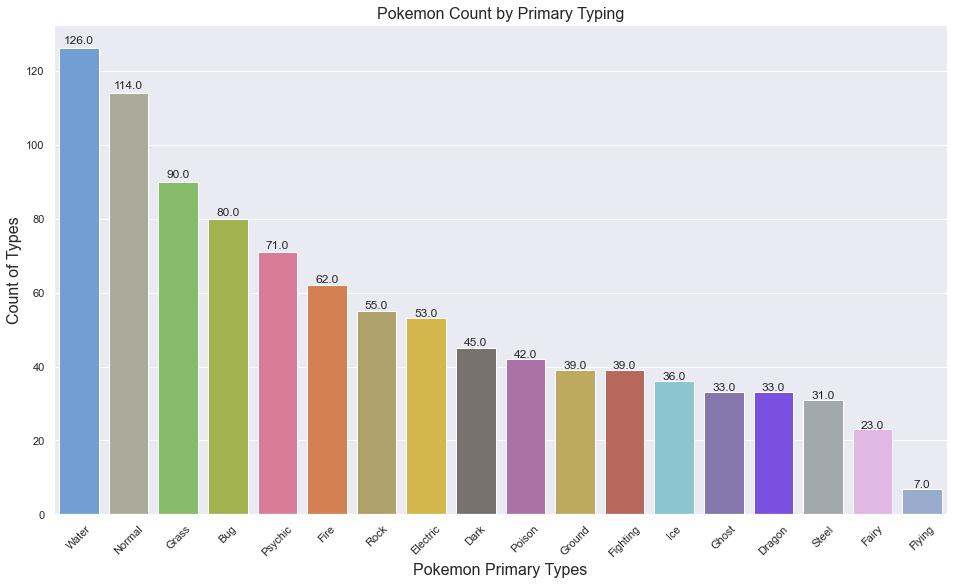

In [8]:
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='primary_type', 
                  data=pokedex, 
                  palette=type_colors, 
                  order=pokedex['primary_type'].value_counts().index)
show_values(p)

fontsize = 16
plt.xlabel('Pokemon Primary Types', fontsize=fontsize)
plt.ylabel('Count of Types', fontsize=fontsize)
plt.xticks(fontsize=fontsize-5, rotation=45)
plt.yticks(fontsize=fontsize-5)
plt.title('Pokemon Count by Primary Typing', fontsize=fontsize);

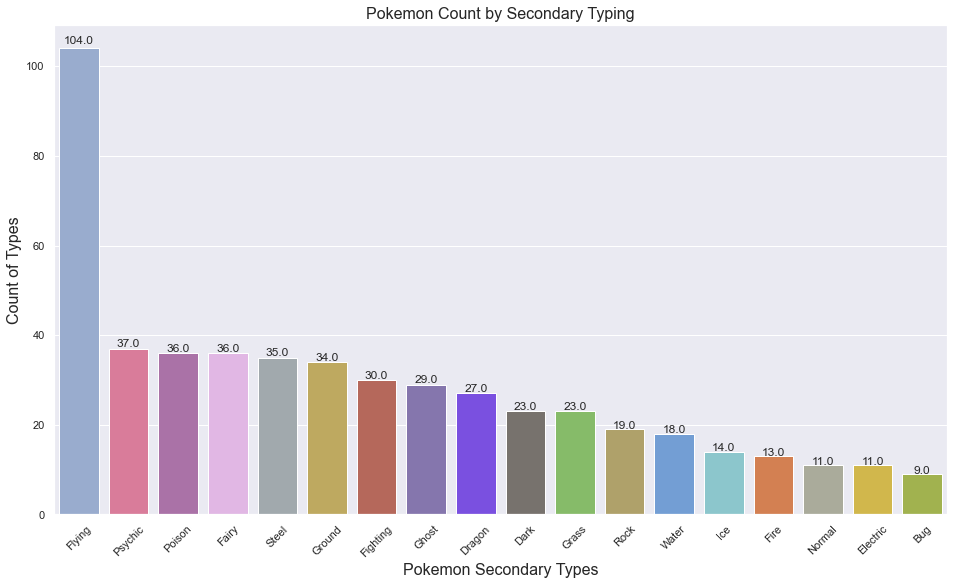

In [9]:
sns.set_theme()
plt.figure(figsize=(16,9)) 
p = sns.countplot(x='secondary_type', 
              data=pokedex, 
              palette=type_colors, 
              order=pokedex['secondary_type'].value_counts().index)
show_values(p)

fontsize = 16
plt.xlabel('Pokemon Secondary Types', fontsize=fontsize)
plt.ylabel('Count of Types', fontsize=fontsize)
plt.xticks(fontsize=fontsize-5, rotation=45)
plt.yticks(fontsize=fontsize-5)
plt.title('Pokemon Count by Secondary Typing', fontsize=fontsize);

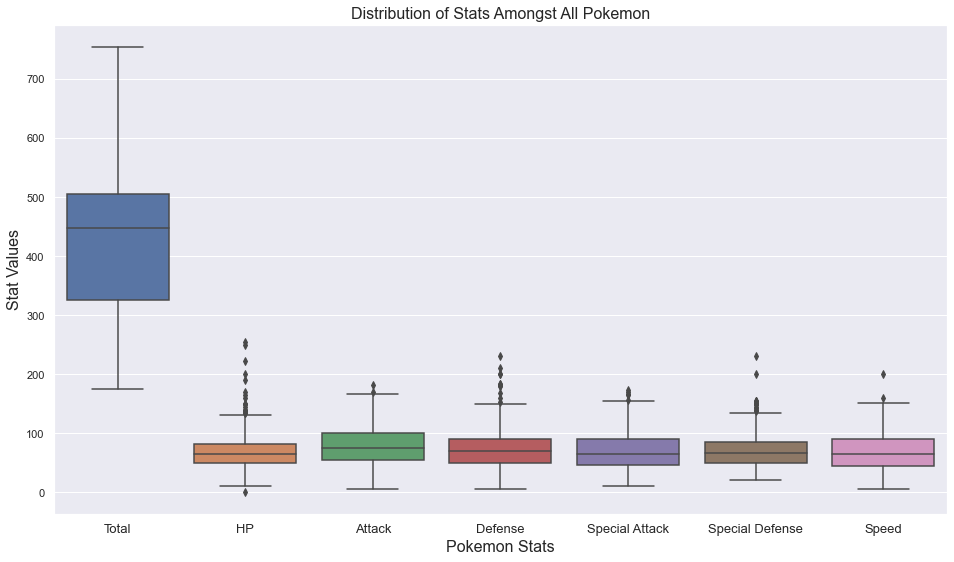

In [10]:
plt.figure(figsize=(16,9))
sns.boxplot(data=pokedex[['total', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']]).set_xticklabels(['Total', 'HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'])

fontsize = 16
plt.xlabel('Pokemon Stats', fontsize=fontsize)
plt.ylabel('Stat Values', fontsize=fontsize)
plt.xticks(fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-5)
plt.title('Distribution of Stats Amongst All Pokemon', fontsize=fontsize);

## 1. Are there correlations between stats and lengendary vs. non-legendary Pokemon?

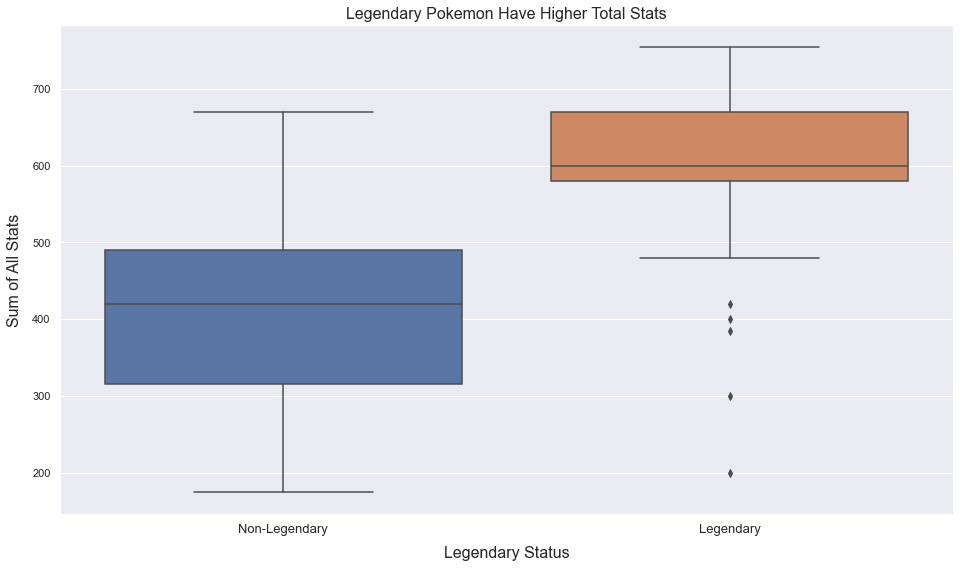

In [11]:
plt.figure(figsize=(16,9))
sns.boxplot(x='legendary', 
               y='total', 
               data=pokedex)

fontsize = 16
plt.xlabel('Legendary Status', fontsize=fontsize, labelpad=10)
plt.ylabel('Sum of All Stats', fontsize=fontsize, labelpad=10)
plt.xticks(fontsize=fontsize-3, ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])
plt.yticks(fontsize=fontsize-5)
plt.title('Legendary Pokemon Have Higher Total Stats', fontsize=fontsize);

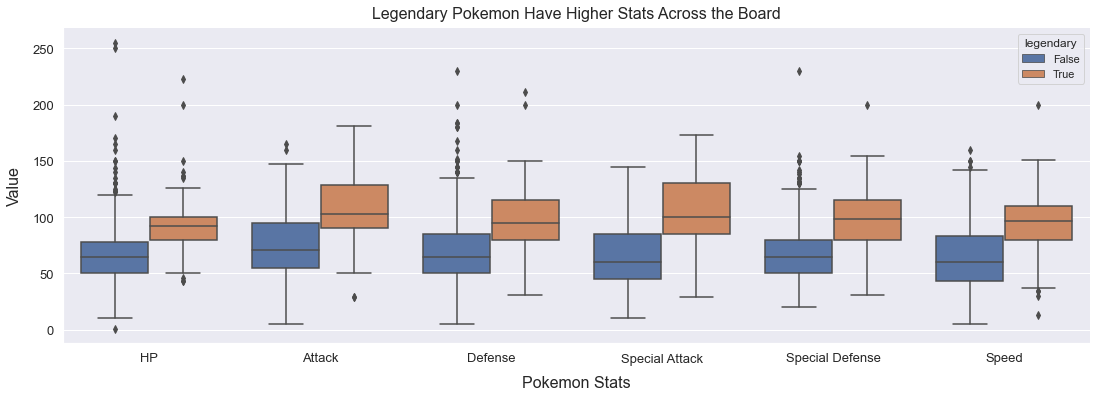

In [12]:
legendary_facet = pokedex[['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'legendary']].melt(id_vars='legendary')

sns.catplot(
    data=legendary_facet, 
    x="variable", 
    y="value", 
    hue="legendary", 
    kind = 'box', 
    height=5, 
    aspect=3, 
    legend_out=False)

fontsize = 16
plt.xlabel('Pokemon Stats', fontsize=fontsize, labelpad=10)
plt.ylabel('Value', fontsize=fontsize, labelpad=10)
plt.xticks(fontsize=fontsize-3, 
           ticks=[0, 1, 2, 3, 4, 5], 
           labels=['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'])
plt.yticks(fontsize=fontsize-3)
plt.title('Legendary Pokemon Have Higher Stats Across the Board', fontsize=fontsize, pad=10);

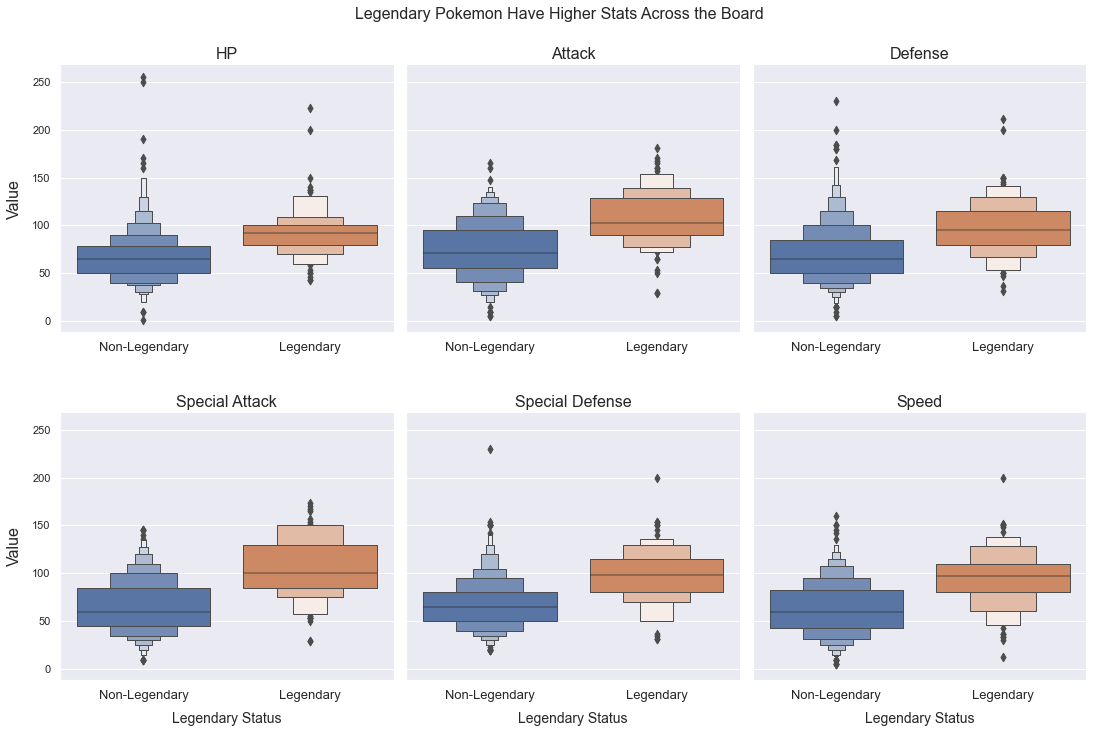

In [13]:
cp = sns.catplot(
    data=legendary_facet, 
    x='legendary', 
    y='value',
    col='variable', 
    kind='boxen', 
    col_wrap=3, 
    sharex=False)

fontsize = 16
cp.set_xticklabels(['Non-Legendary', 'Legendary'], fontsize=fontsize-3)
cp.set_xlabels('Legendary Status', labelpad=10, fontsize=fontsize-2)
cp.set_ylabels('Value', labelpad=10, fontsize=fontsize)
cp.fig.suptitle('Legendary Pokemon Have Higher Stats Across the Board', fontsize=fontsize)
cp.fig.subplots_adjust(top=.9)
axes = cp.axes.flatten()
axes[0].set_title("HP", fontsize=fontsize)
axes[1].set_title("Attack", fontsize=fontsize)
axes[2].set_title("Defense", fontsize=fontsize)
axes[3].set_title("Special Attack", fontsize=fontsize)
axes[4].set_title("Special Defense", fontsize=fontsize)
axes[5].set_title("Speed", fontsize=fontsize)
plt.subplots_adjust(hspace=0.3);

## 2. Are there correlations between stats and Pokemon's typing?

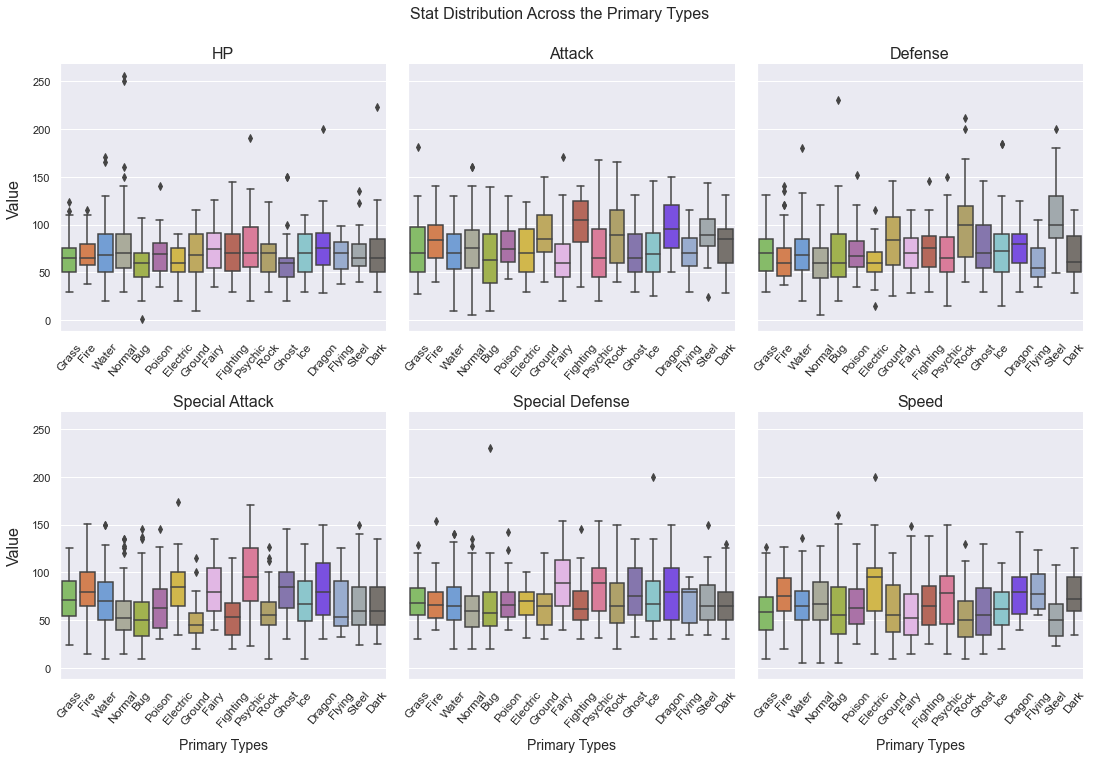

In [14]:
primary_type_facet = pokedex[['primary_type', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].melt(id_vars='primary_type')

cp = sns.catplot(
    data=primary_type_facet, 
    x='primary_type', 
    y='value',
    col='variable', 
    kind='box', 
    col_wrap=3,
    palette=type_colors, 
    order=type_order, 
    sharex=False)

fontsize = 16
cp.set_xticklabels(rotation=50, fontsize=fontsize-4)
cp.set_xlabels('Primary Types', labelpad=10, fontsize=fontsize-2)
cp.set_ylabels('Value', labelpad=10, fontsize=fontsize)
cp.fig.suptitle('Stat Distribution Across the Primary Types', fontsize=fontsize)
cp.fig.subplots_adjust(top=.9)
axes = cp.axes.flatten()
axes[0].set_title("HP", fontsize=fontsize)
axes[1].set_title("Attack", fontsize=fontsize)
axes[2].set_title("Defense", fontsize=fontsize)
axes[3].set_title("Special Attack", fontsize=fontsize)
axes[4].set_title("Special Defense", fontsize=fontsize)
axes[5].set_title("Speed", fontsize=fontsize)
plt.subplots_adjust(hspace=0.3);

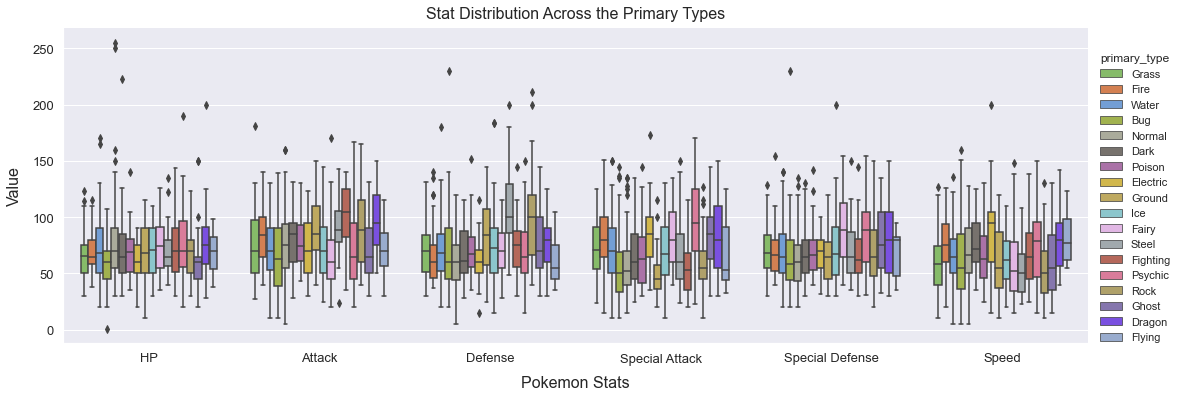

In [15]:
sns.catplot(
    data=primary_type_facet, 
    x="variable", 
    y="value", 
    hue="primary_type", 
    kind = 'box', 
    height=5, 
    aspect=3, 
    palette=type_colors)

fontsize = 16
plt.xlabel('Pokemon Stats', fontsize=fontsize, labelpad=10)
plt.ylabel('Value', fontsize=fontsize, labelpad=10)
plt.xticks(fontsize=fontsize-3, 
           ticks=[0, 1, 2, 3, 4, 5], 
           labels=['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'])
plt.yticks(fontsize=fontsize-3)
plt.title('Stat Distribution Across the Primary Types', fontsize=fontsize, pad=10);

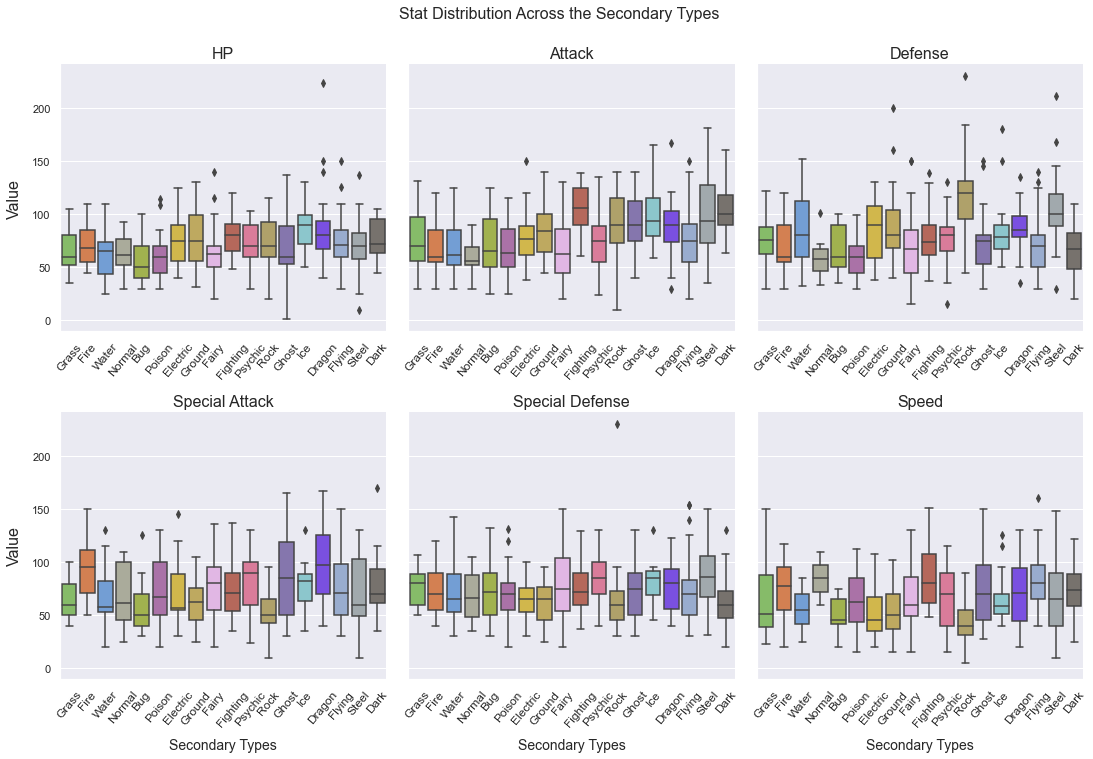

In [16]:
secondary_type_facet = pokedex[['secondary_type', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].melt(id_vars='secondary_type')

cp = sns.catplot(
    data=secondary_type_facet, 
    x='secondary_type', 
    y='value',
    col='variable', 
    kind='box', 
    col_wrap=3,
    palette=type_colors, 
    order=type_order, 
    sharex=False)

fontsize = 16
cp.set_xticklabels(rotation=50, fontsize=fontsize-4)
cp.set_xlabels('Secondary Types', labelpad=10, fontsize=fontsize-2)
cp.set_ylabels('Value', labelpad=10, fontsize=fontsize)
cp.fig.suptitle('Stat Distribution Across the Secondary Types', fontsize=fontsize)
cp.fig.subplots_adjust(top=.9)
axes = cp.axes.flatten()
axes[0].set_title("HP", fontsize=fontsize)
axes[1].set_title("Attack", fontsize=fontsize)
axes[2].set_title("Defense", fontsize=fontsize)
axes[3].set_title("Special Attack", fontsize=fontsize)
axes[4].set_title("Special Defense", fontsize=fontsize)
axes[5].set_title("Speed", fontsize=fontsize)
plt.subplots_adjust(hspace=0.3);

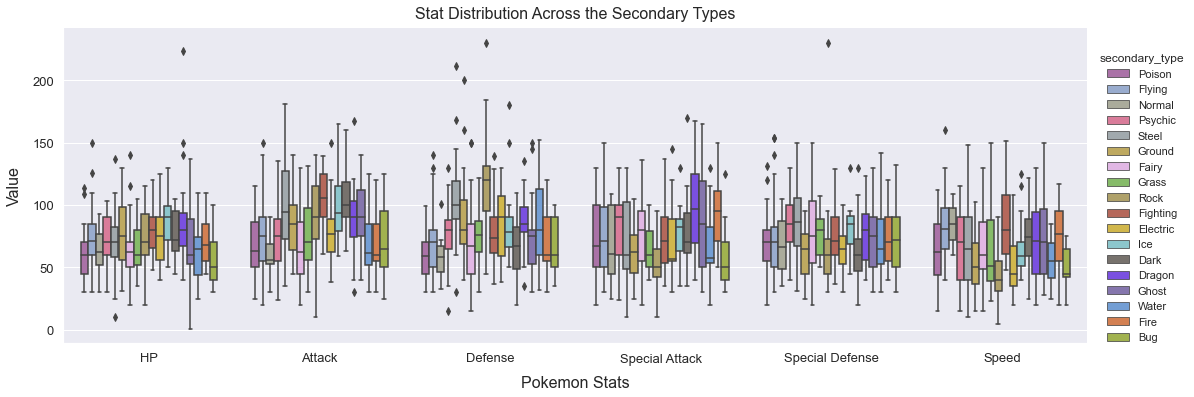

In [17]:
sns.catplot(
    data=secondary_type_facet, 
    x="variable", 
    y="value", 
    hue="secondary_type", 
    kind = 'box', 
    height=5, 
    aspect=3, 
    palette=type_colors)

fontsize = 16
plt.xlabel('Pokemon Stats', fontsize=fontsize, labelpad=10)
plt.ylabel('Value', fontsize=fontsize, labelpad=10)
plt.xticks(fontsize=fontsize-3, 
           ticks=[0, 1, 2, 3, 4, 5], 
           labels=['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'])
plt.yticks(fontsize=fontsize-3)
plt.title('Stat Distribution Across the Secondary Types', fontsize=fontsize, pad=10);

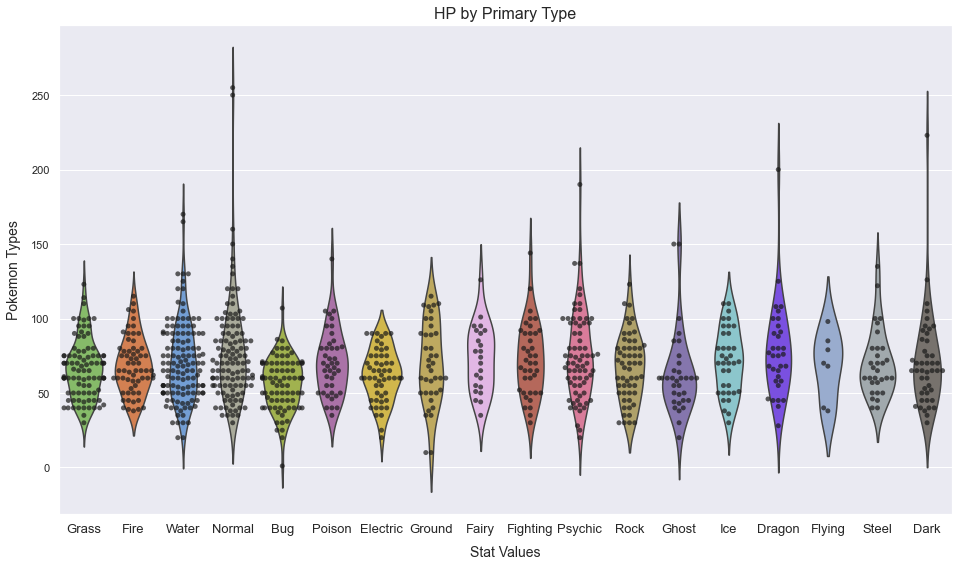

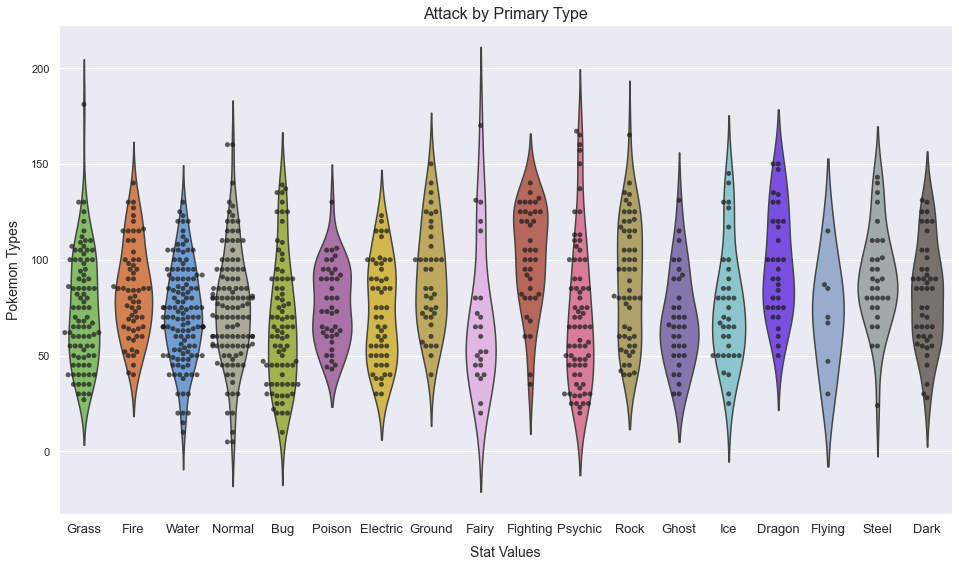

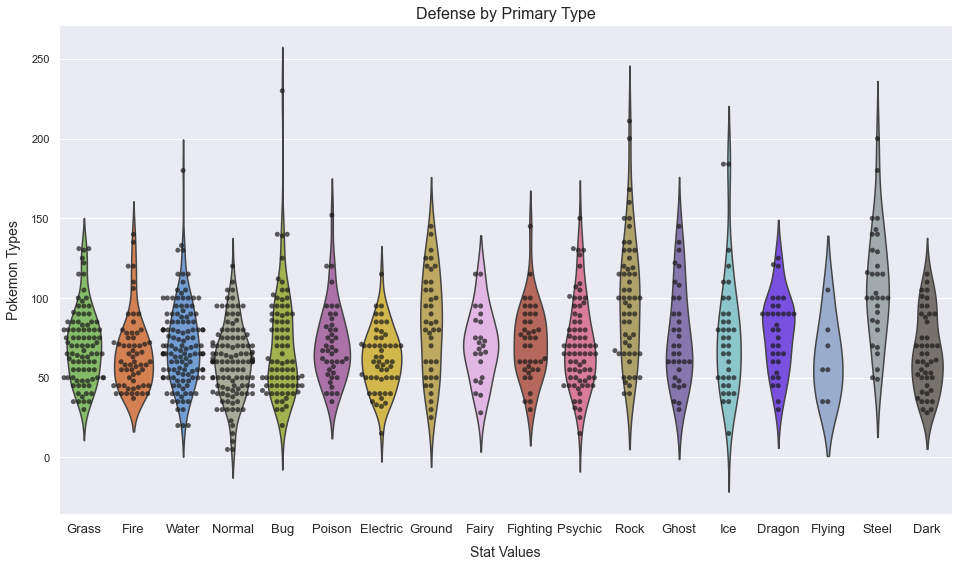

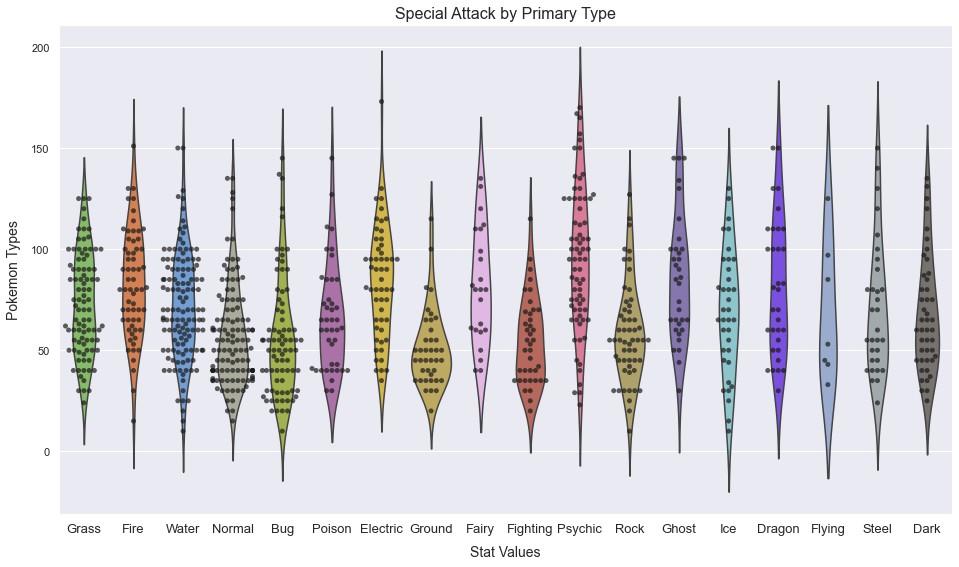

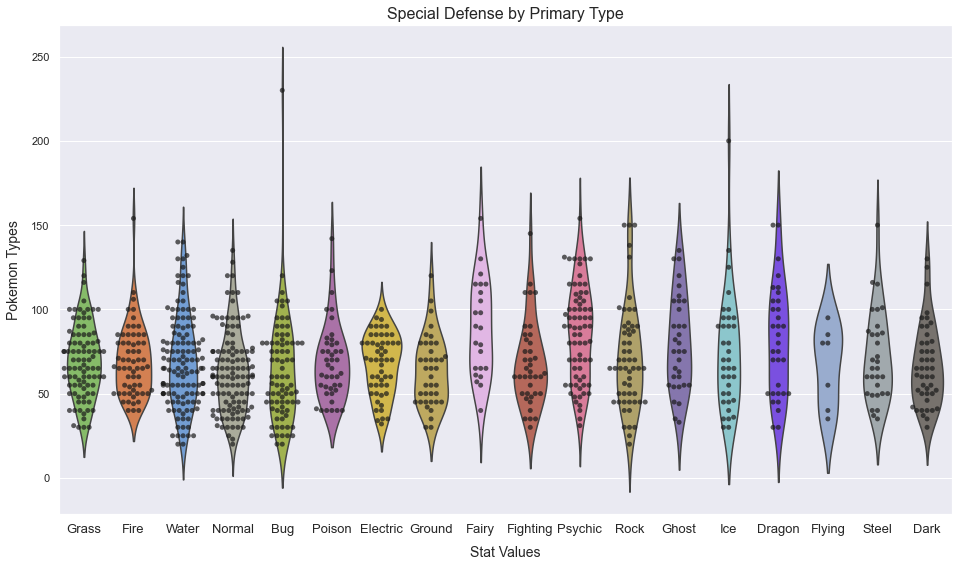

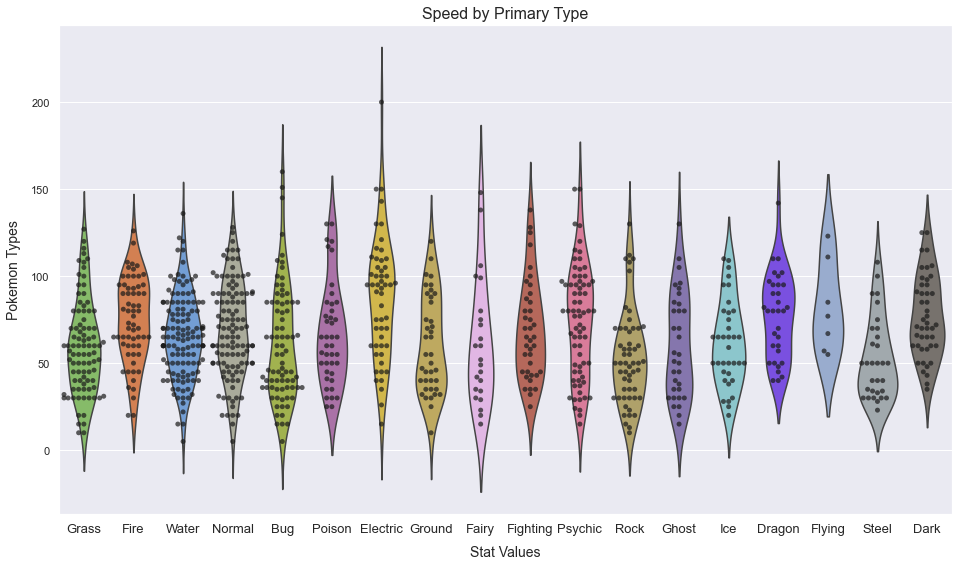

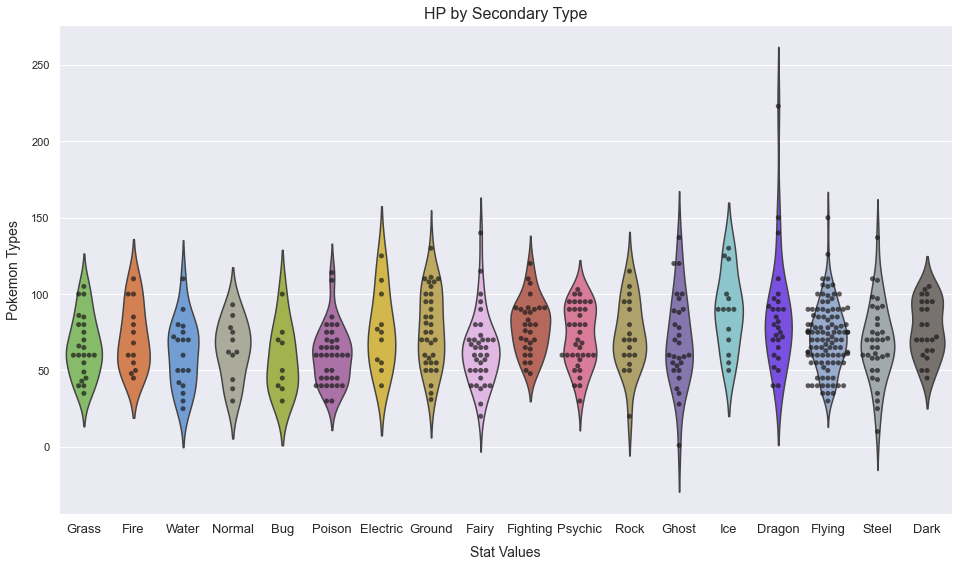

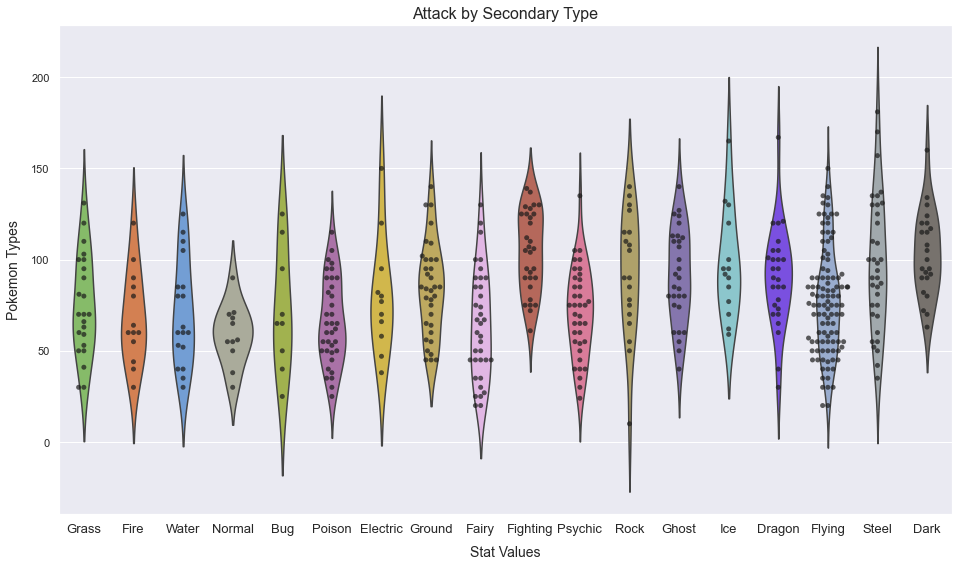

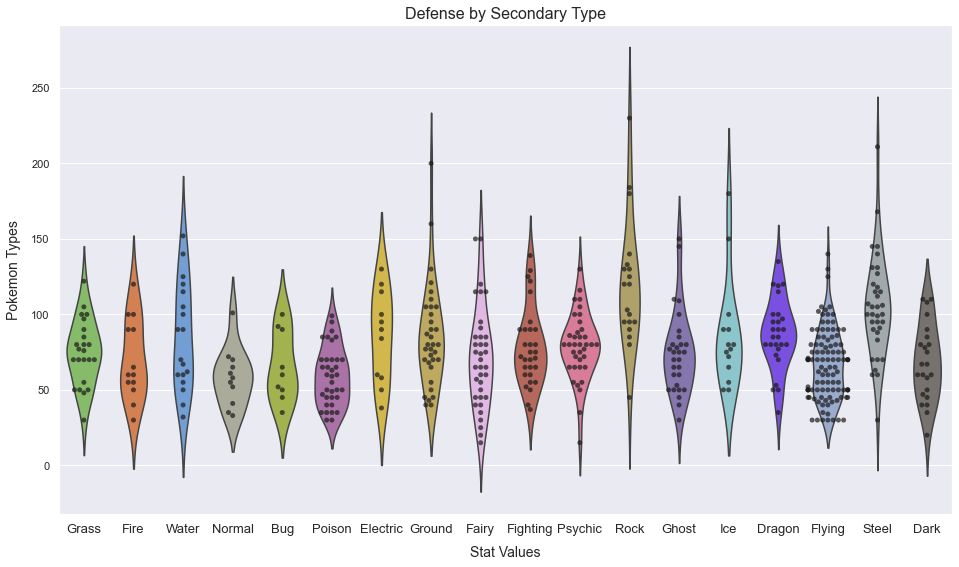

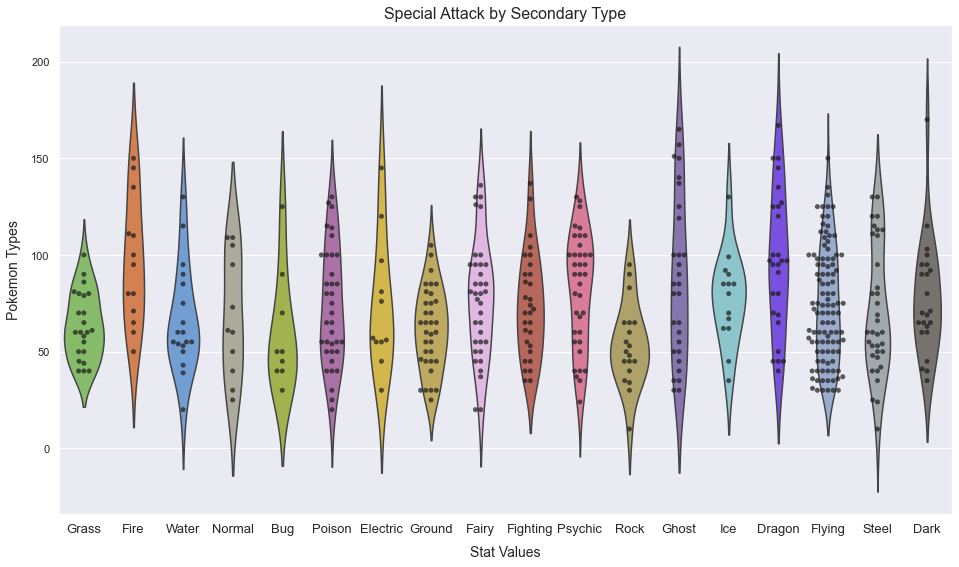

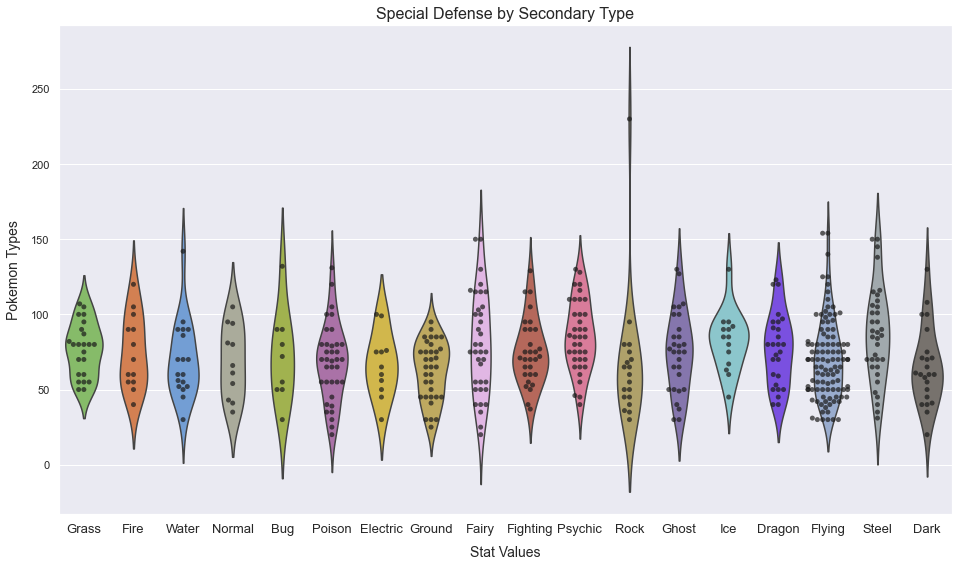

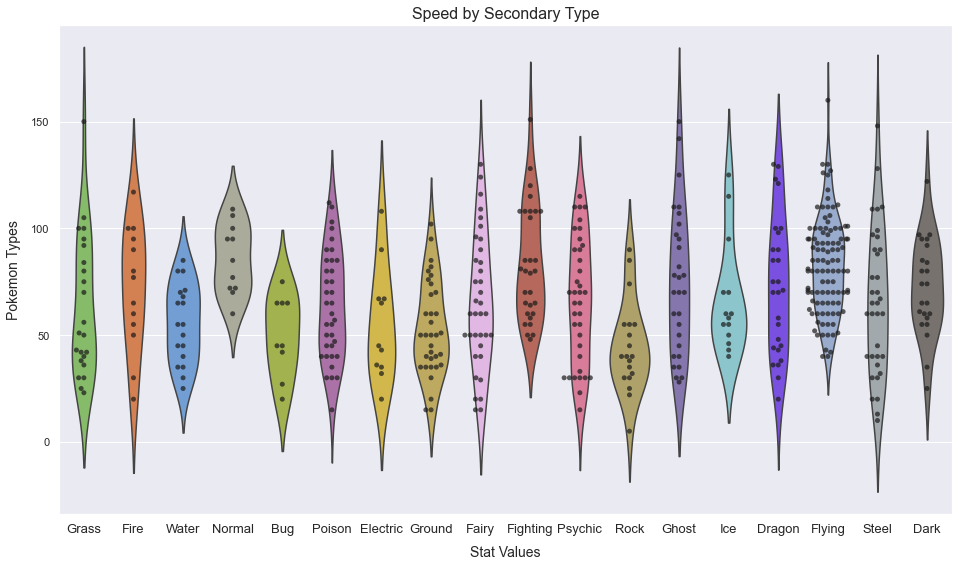

In [18]:
for i in ['primary', 'secondary']:
    for j in ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']:

        plt.figure(figsize=(16,9))

        sns.violinplot(x='{}_type'.format(i), 
                       y=j, 
                       data=pokedex, 
                       inner=None, 
                       palette=type_colors, 
                       order=type_order)

        sns.swarmplot(x='{}_type'.format(i), 
                       y=j, 
                       data=pokedex, 
                       color='k', 
                       alpha=0.7, 
                       order=type_order)
        
        if j == 'sp_atk':
            j = 'Special Attack'
        elif j == 'sp_def':
            j = 'Special Defense'

        fontsize = 16
        plt.xlabel('Stat Values', fontsize=fontsize-2, labelpad=10)
        plt.ylabel('Pokemon Types', fontsize=fontsize-2, labelpad=10)
        plt.xticks(fontsize=fontsize-3)
        plt.yticks(fontsize=fontsize-5)
        
        if j == 'hp': 
            plt.title('{} by {} Type'.format(j.upper(), i.capitalize()), fontsize=fontsize);
        else:
            plt.title('{} by {} Type'.format(j.title(), i.capitalize()), fontsize=fontsize);

## 3. Is there a correlation between catch_rate and legendary status?

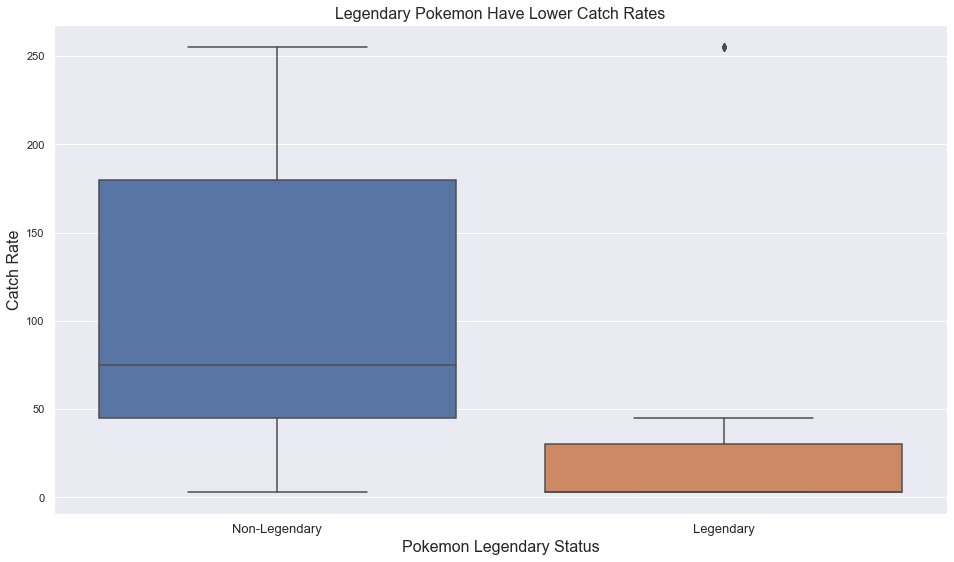

In [19]:
plt.figure(figsize=(16,9))
sns.boxplot(x='legendary', 
               y='catch_rate', 
               data=pokedex);

fontsize = 16
plt.xlabel('Pokemon Legendary Status', fontsize=fontsize)
plt.ylabel('Catch Rate', fontsize=fontsize)
plt.xticks(fontsize=fontsize-3, ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])
plt.yticks(fontsize=fontsize-5)
plt.title('Legendary Pokemon Have Lower Catch Rates', fontsize=fontsize);

## 4. Is there power creep from earlier generations to later generations?

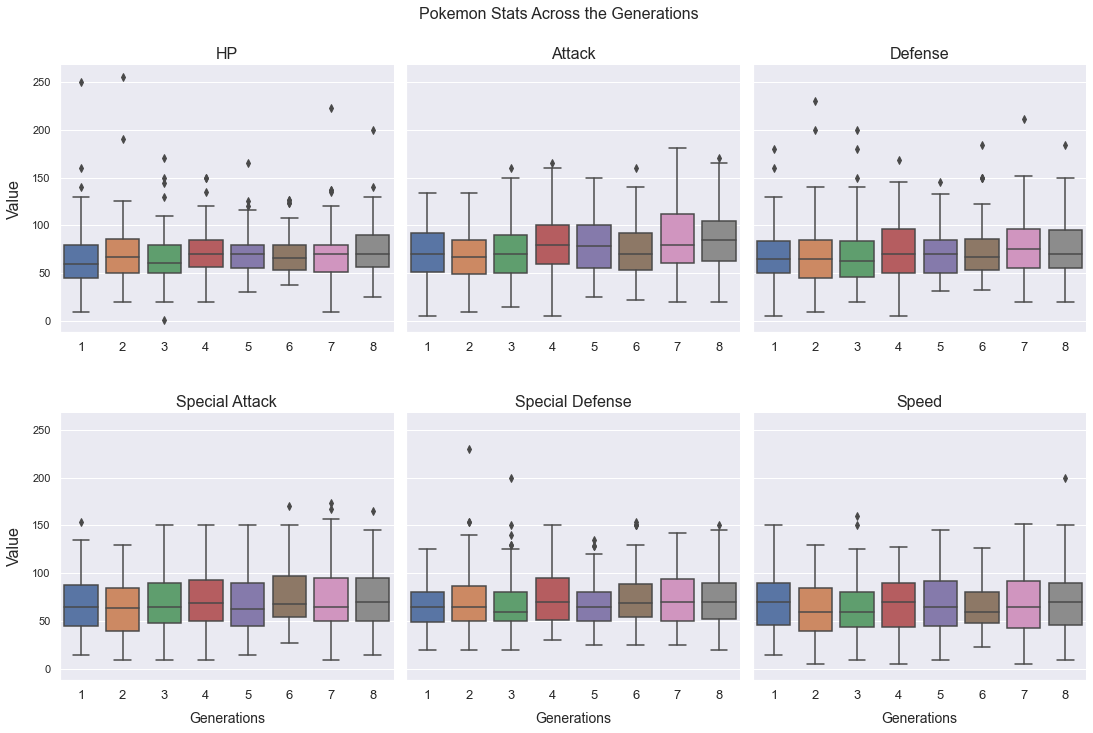

In [20]:
generation_facet = pokedex[['generation', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].melt(id_vars='generation')

cp = sns.catplot(
    data=generation_facet, 
    x='generation', 
    y='value',
    col='variable', 
    kind='box', 
    col_wrap=3, 
    sharex=False)

fontsize = 16
cp.set_xticklabels(fontsize=fontsize-3)
cp.set_xlabels('Generations', labelpad=10, fontsize=fontsize-2)
cp.set_ylabels('Value', labelpad=10, fontsize=fontsize)
cp.fig.suptitle('Pokemon Stats Across the Generations', fontsize=fontsize)
cp.fig.subplots_adjust(top=.9)
axes = cp.axes.flatten()
axes[0].set_title("HP", fontsize=fontsize)
axes[1].set_title("Attack", fontsize=fontsize)
axes[2].set_title("Defense", fontsize=fontsize)
axes[3].set_title("Special Attack", fontsize=fontsize)
axes[4].set_title("Special Defense", fontsize=fontsize)
axes[5].set_title("Speed", fontsize=fontsize)
plt.subplots_adjust(hspace=0.3);

## 5. Create overall correlation chart with all variables.

In [21]:
type_stats = pokedex[['primary_type', 'secondary_type', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']]
one_hot_type_stats = pd.get_dummies(type_stats, columns=['primary_type', 'secondary_type'], prefix=['primary', 'secondary'])
corr_type_stats = one_hot_type_stats.corr()

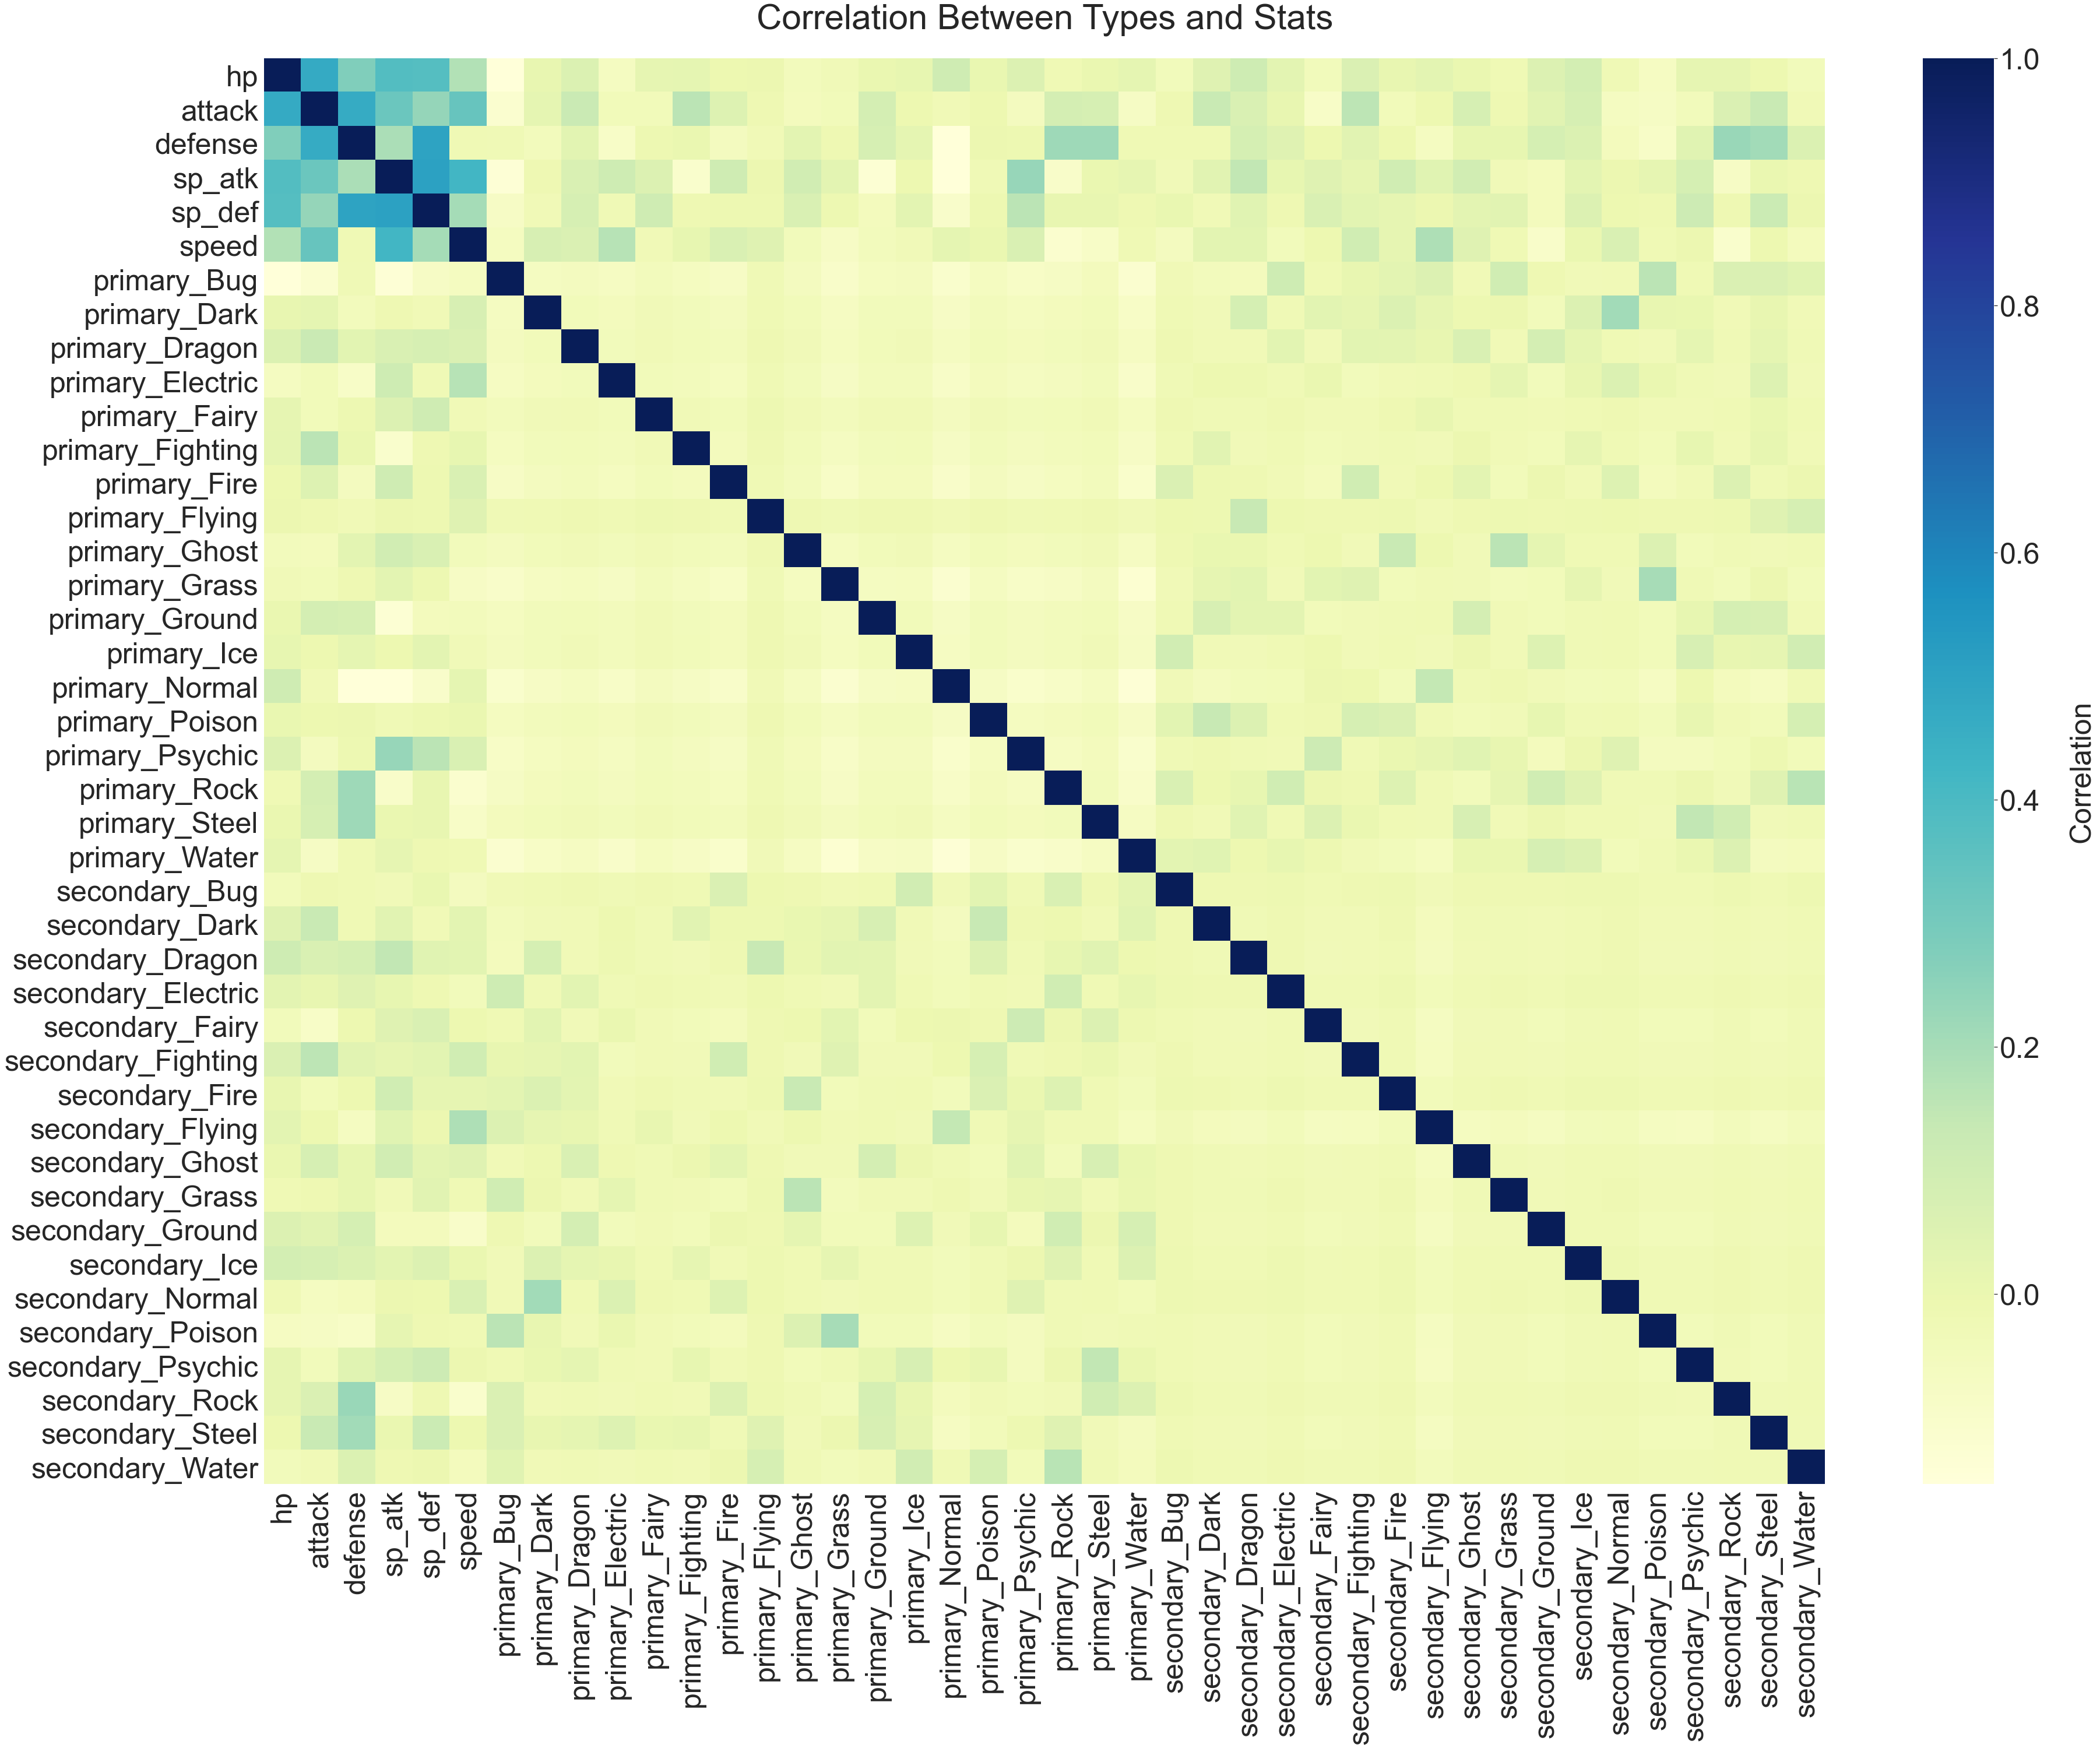

In [22]:
plt.figure(figsize=(60, 45))
fontsize = 50

hm = sns.heatmap(corr_type_stats, cmap="YlGnBu")

hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize=fontsize)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize=fontsize)

hm.figure.axes[-1].tick_params(axis='y', labelsize=fontsize)
hm.figure.axes[-1].set_ylabel('Correlation', size=fontsize, labelpad=50)

plt.title('Correlation Between Types and Stats', fontsize=fontsize + 10, pad=50)

plt.show();